#3.Import the required packages with their customary aliases as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

#4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df= pd.read_csv('../data/gdp_percapita.csv')

In [5]:
type(gdp_df)


pandas.core.frame.DataFrame

#5. How many rows and columns are in gdp_df? What are the data types of each column?

In [7]:
gdp_df.shape

(7662, 4)

In [8]:
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


Answer #5: 7662 rows x 4 columns. Object, Int64, float64, float64

#6.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [12]:
gdp_df= gdp_df.drop(columns=['Value Footnotes'])

In [13]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country','Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


#7.How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [15]:
gdp_df['Year'].describe()

count    7662.000000
mean     2006.388280
std         9.418727
min      1990.000000
25%      1998.000000
50%      2007.000000
75%      2015.000000
max      2022.000000
Name: Year, dtype: float64

In [16]:
2022-1990


32

In [17]:
gdp_df.groupby('Country')['Year'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Afghanistan,20.0,2011.5,5.916080,2002.0,2006.75,2011.5,2016.25,2021.0
Africa Eastern and Southern,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
Africa Western and Central,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
Albania,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
Algeria,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
...,...,...,...,...,...,...,...,...
Viet Nam,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0
West Bank and Gaza,29.0,2008.0,8.514693,1994.0,2001.00,2008.0,2015.00,2022.0
World,33.0,2006.0,9.669540,1990.0,1998.00,2006.0,2014.00,2022.0


In [18]:
gdp_df.groupby('Country')['Year'].nunique()

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64

In [19]:
gdp_df.groupby('Country')['Year'].nunique().sort_values()

Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
                             ..
Jamaica                      33
Japan                        33
Jordan                       33
IDA total                    33
Zimbabwe                     33
Name: Year, Length: 242, dtype: int64

In [20]:
gdp_df.groupby('Country')['Year'].nunique().sort_values().reset_index()

,Country,Year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
...,...,...
237,Jamaica,33
238,Japan,33
239,Jordan,33
240,IDA total,33


In [21]:
#create a new table for missing countries
missing_countries = gdp_df.groupby('Country')['Year'].nunique().sort_values().reset_index()

In [22]:
missing_countries['Year']<33

0       True
1       True
2       True
3       True
4       True
       ...  
237    False
238    False
239    False
240    False
241    False
Name: Year, Length: 242, dtype: bool

In [23]:
missing_countries[missing_countries['Year']<33].count()

Country    40
Year       40
dtype: int64

In [24]:
missing_countries[missing_countries['Year']<33]

,Country,Year
0,Djibouti,10
1,Somalia,10
2,Turks and Caicos Islands,12
3,Sint Maarten (Dutch part),14
4,Kosovo,15
5,Cayman Islands,16
6,Nauru,19
7,Afghanistan,20
8,CuraÃ§ao,22
9,Palau,22


In [25]:
missing_countries['Year']<33

0       True
1       True
2       True
3       True
4       True
       ...  
237    False
238    False
239    False
240    False
241    False
Name: Year, Length: 242, dtype: bool

In [26]:
#NOTE: to show all the data set we use pd.set_option('display.max_rows', None)


In [27]:
missing_countries[missing_countries['Year']==33].count()

Country    202
Year       202
dtype: int64

Answer: There is 202 countries with complete data and 40 without it. What I noticed is that there is many countries that only has 10 to 20 years of data that could means they are new countries or they change their names or they start to meassure their gpd per capita from recently years

#8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.

In [30]:
gdp_df['Year']==2020


0       False
1        True
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661    False
Name: Year, Length: 7662, dtype: bool

In [31]:
gdp_2020_boolean=gdp_df['Year']==2020

In [32]:
gdp_df[gdp_df['Year']==2020]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


In [33]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]

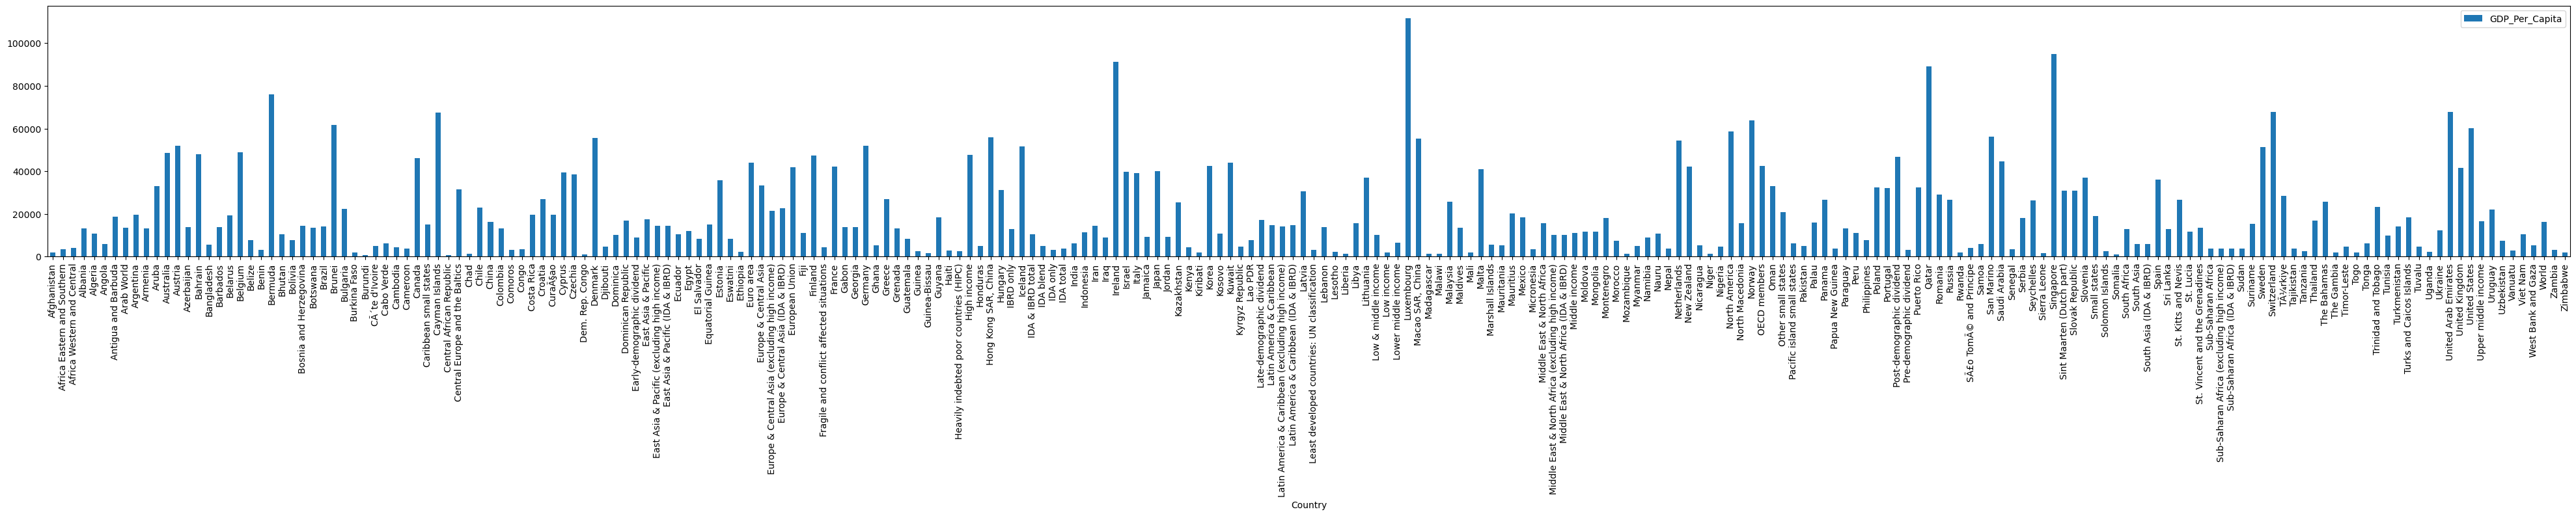

In [34]:
gdp_2020.plot(kind='bar',
              x='Country',
              y='GDP_Per_Capita',
              figsize=(50,5));

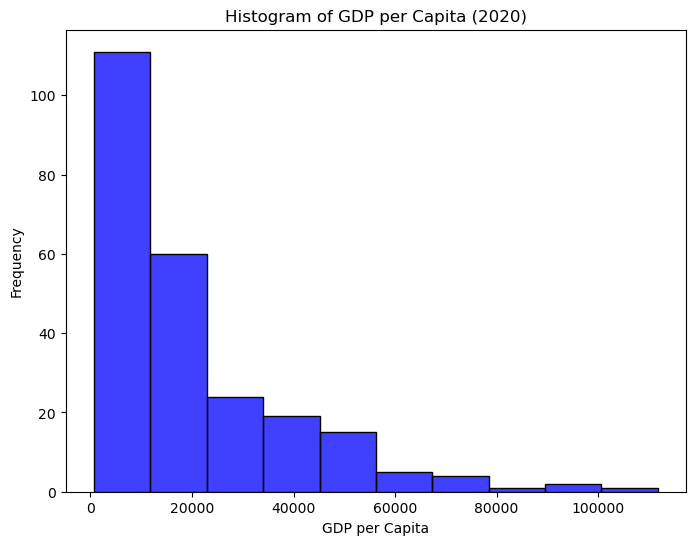

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(gdp_2020['GDP_Per_Capita'], bins=10, kde=False, color='blue')
plt.title('Histogram of GDP per Capita (2020)')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

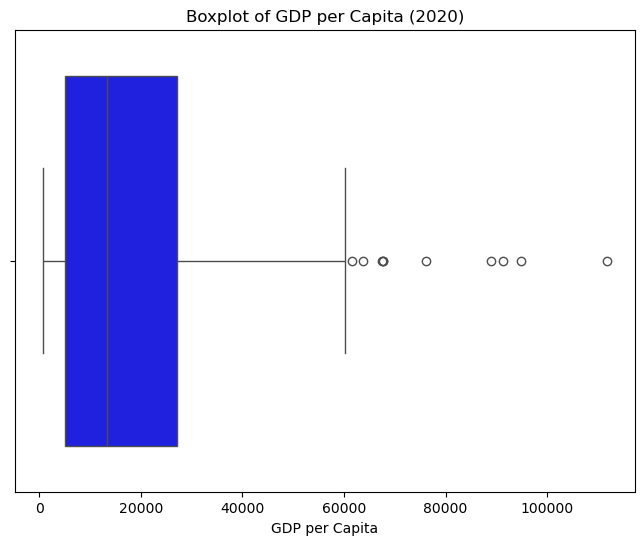

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=gdp_2020['GDP_Per_Capita'], color='blue')
plt.title('Boxplot of GDP per Capita (2020)')
plt.xlabel('GDP per Capita')
plt.show()

C:\Users\juan_\AppData\Local\Temp\ipykernel_54784\1290256789.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gdp_2020['GDP_Per_Capita'], shade=True, color='blue')


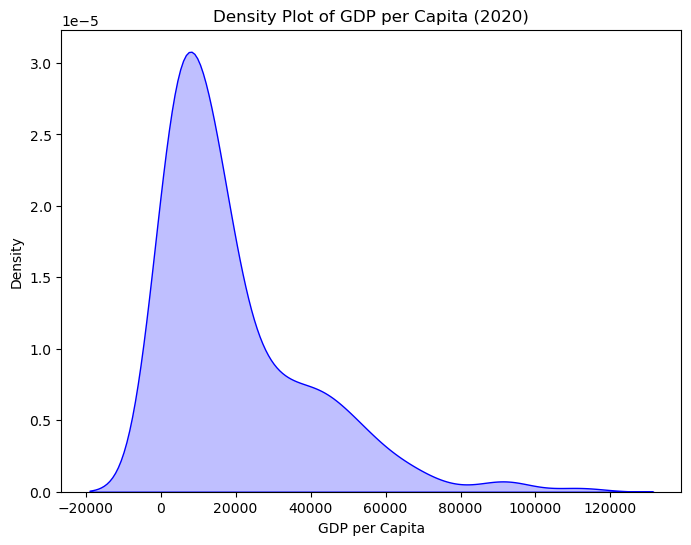

In [37]:
plt.figure(figsize=(8, 6))
sns.kdeplot(gdp_2020['GDP_Per_Capita'], shade=True, color='blue')
plt.title('Density Plot of GDP per Capita (2020)')
plt.xlabel('GDP per Capita')
plt.ylabel('Density')
plt.show()

C:\Users\juan_\AppData\Local\Temp\ipykernel_54784\453404806.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(gdp_2020['GDP_Per_Capita'], shade=True, ax=axes[2], color='blue')


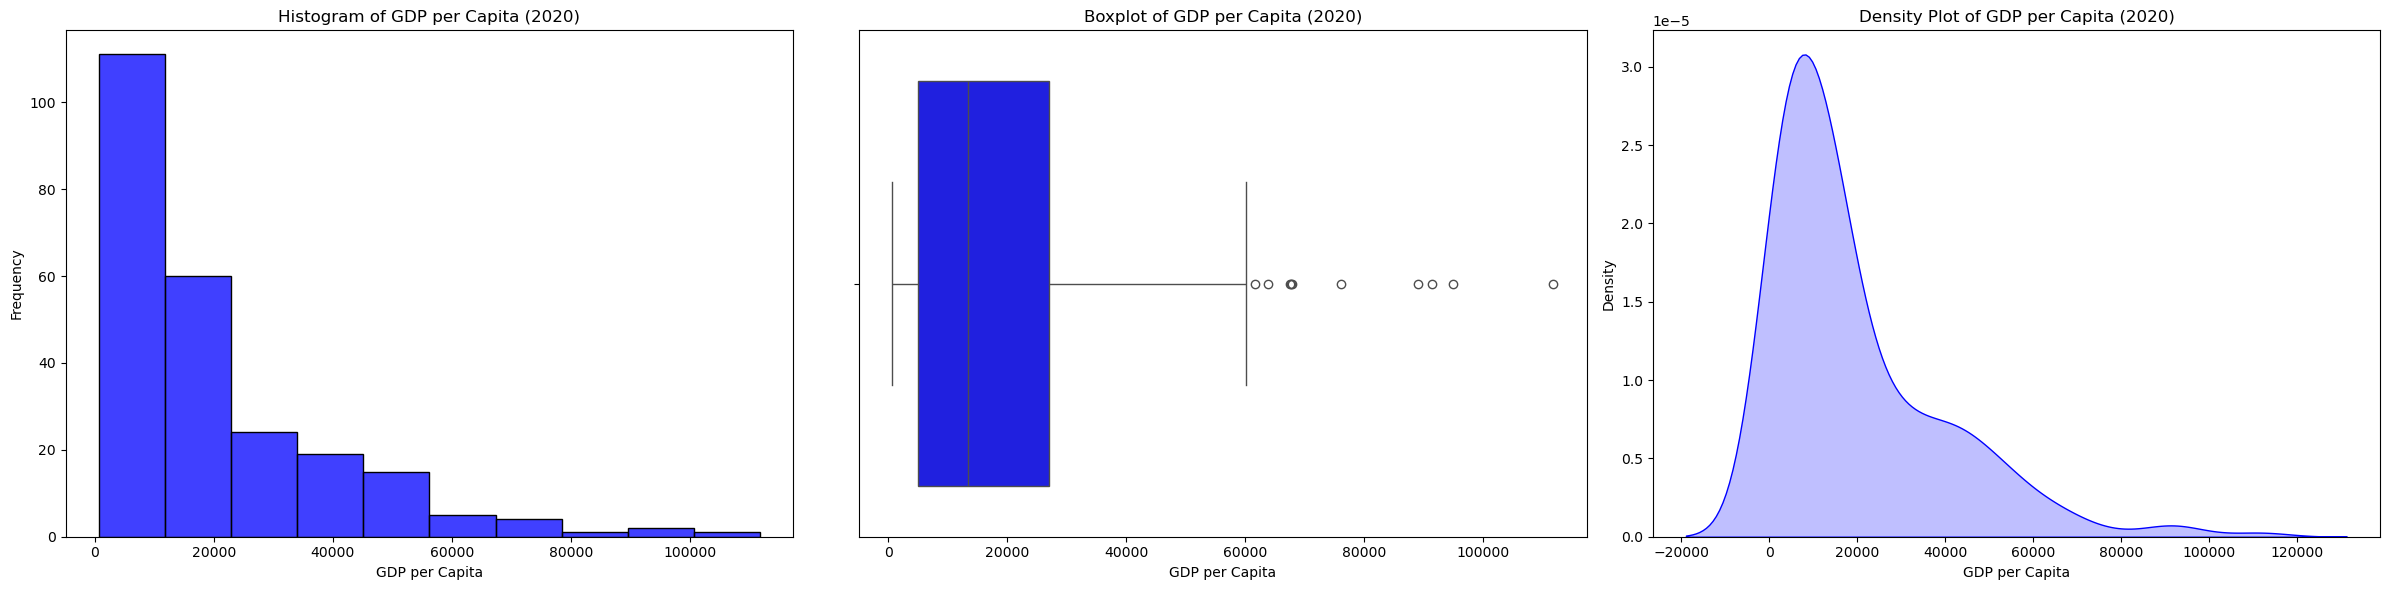

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Histogram
sns.histplot(gdp_2020['GDP_Per_Capita'], bins=10, kde=False, ax=axes[0], color='blue')
axes[0].set_title('Histogram of GDP per Capita (2020)')
axes[0].set_xlabel('GDP per Capita')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=gdp_2020['GDP_Per_Capita'], ax=axes[1], color='blue')
axes[1].set_title('Boxplot of GDP per Capita (2020)')
axes[1].set_xlabel('GDP per Capita')

# Density Plot
sns.kdeplot(gdp_2020['GDP_Per_Capita'], shade=True, ax=axes[2], color='blue')
axes[2].set_title('Density Plot of GDP per Capita (2020)')
axes[2].set_xlabel('GDP per Capita')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()

#9.What was the median GDP per capita value in 2020?

In [40]:
gdp_median=round(gdp_2020['GDP_Per_Capita'].median(),2)

In [41]:
gdp_median

13358.0

#10.For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020.
Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. 

In [43]:
gdp_df['Year']==1990

0       False
1       False
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661     True
Name: Year, Length: 7662, dtype: bool

In [44]:
gdp_1990=gdp_df[gdp_df['Year']==1990]

In [45]:
gdp_2000=gdp_df[gdp_df['Year']==2000]

In [46]:
gdp_2010=gdp_df[gdp_df['Year']==2010]

In [47]:
gdp_df['Year'].isin([1990,2000,2010,2020])

0       False
1        True
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661     True
Name: Year, Length: 7662, dtype: bool

In [48]:
gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


In [49]:
gdp_decades=gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]

''

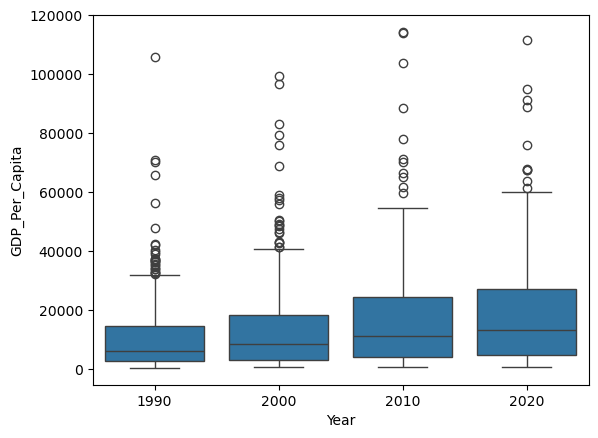

In [50]:
# box plot
sns.boxplot(data = gdp_decades,
           x='Year',
           y = 'GDP_Per_Capita')
;

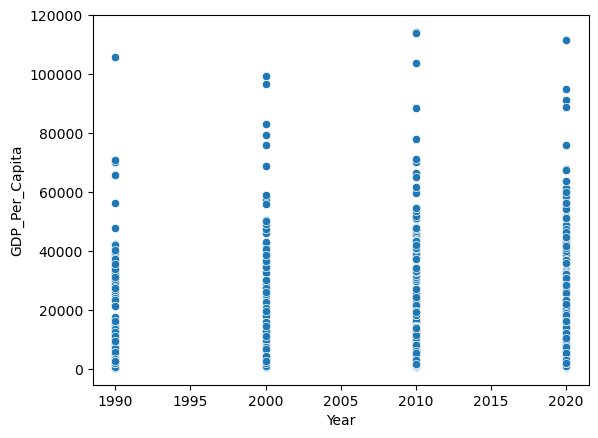

In [51]:
sns.scatterplot(data=gdp_decades,
               x='Year',
               y='GDP_Per_Capita');

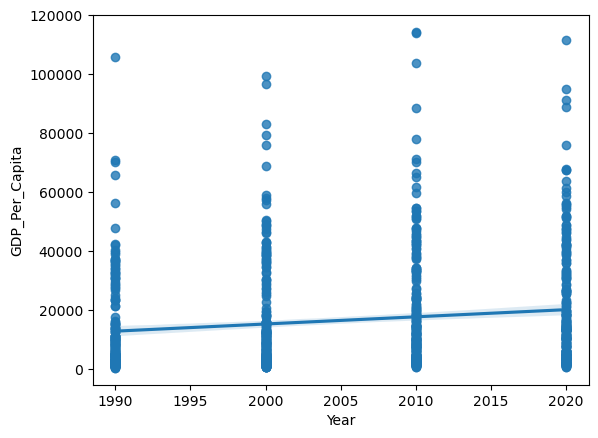

In [52]:
sns.regplot(data = gdp_decades, 
            x = 'Year', 
            y = 'GDP_Per_Capita');

#11.Which country was the first to have a GDP per capita greater than $100,000?

In [54]:
gdp_df['GDP_Per_Capita']>100000

0       False
1       False
2       False
3       False
4       False
        ...  
7657    False
7658    False
7659    False
7660    False
7661    False
Name: GDP_Per_Capita, Length: 7662, dtype: bool

In [55]:
gdp_100=gdp_df[gdp_df['GDP_Per_Capita']>100000]

In [56]:
gdp_100.sort_values(by='Year').head(1)

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059


#12. Which country had the highest GDP per capita in 2020? 
Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [58]:
gdp_2020.sort_values(by='GDP_Per_Capita',ascending=False).head(1)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [59]:
gdp_df[gdp_df['Country']=='Luxembourg']

,Country,Year,GDP_Per_Capita
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563
4154,Luxembourg,2014,113313.578898
4155,Luxembourg,2013,113050.663254


In [62]:
gdp_lux=gdp_df[gdp_df['Country']=='Luxembourg']

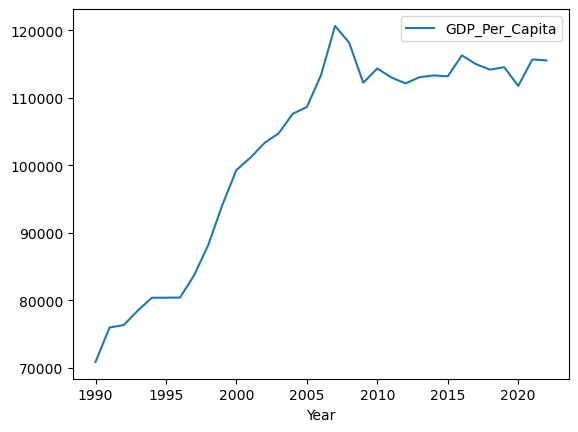

In [72]:
gdp_lux.plot(x='Year',
               y='GDP_Per_Capita',
               kind='line', # (facultative) Default argument
               grid=False, # Add a grid in the background
              )
plt.show()

#13.Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? 
Which countries had lower GDP per capita in 2020 than in 1990?

In [74]:
gdp_2020.sort_values(by='GDP_Per_Capita',ascending=True).head(1)

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [78]:
gdp_df[gdp_df['Country']=='Burundi']

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


In [80]:
gdp_bur=gdp_df[gdp_df['Country']=='Burundi']

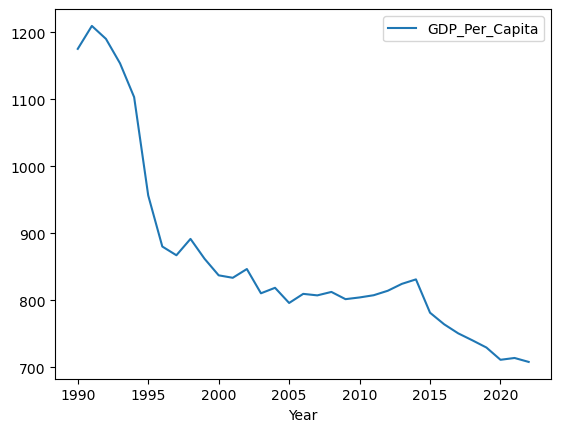

In [82]:
gdp_bur.plot(x='Year',
               y='GDP_Per_Capita',
               kind='line', # (facultative) Default argument
               grid=False, # Add a grid in the background
              )
plt.show()

In [86]:
#bonus
gdp_df[[gdp_2020['GDP_Per_Capita']<[gdp_1990['GDP_Per_Capita']]

SyntaxError: incomplete input (2302794892.py, line 2)

#14.Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this

In [108]:
internet_df= pd.read_csv('../data/internet_use.csv',nrows=6083)

In [110]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


#15.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [113]:
internet_df= internet_df.drop(columns=['Value Footnotes'])

In [117]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [119]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country','Year':'Year', 'Value':'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


#16.Look at the number of observations in this dataset per year. What do you notice?

#17.What is the first year to have a non-zero internet users percentage value?

In [135]:
internet_df['Internet_Users_Pct']>0

0        True
1        True
2        True
3        True
4        True
        ...  
6078     True
6079     True
6080     True
6081     True
6082    False
Name: Internet_Users_Pct, Length: 6083, dtype: bool

In [139]:
internet_df[internet_df['Internet_Users_Pct']>0]

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [153]:
non_zero=internet_df[internet_df['Internet_Users_Pct']>0]
non_zero['Year'].min()

1990

#18.How does the distribution of internet users percent differ for 2000 and 2014?

In [155]:
internet_df['Year'].isin([2000,2014])

0       False
1       False
2       False
3       False
4       False
        ...  
6078    False
6079    False
6080    False
6081    False
6082    False
Name: Year, Length: 6083, dtype: bool

In [157]:
internet_df[internet_df['Year'].isin([2000,2014])]

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


Statistics for the year 2000:
count    210.000000
mean       9.332385
std       13.644205
min        0.000000
25%        0.482059
50%        2.886680
75%       10.539025
max       58.620700
Name: Internet_Users_Pct, dtype: float64

Statistics for the year 2014:
count    204.000000
mean      45.604925
std       29.295667
min        0.990000
25%       17.403300
50%       46.818000
75%       70.262500
max       98.158000
Name: Internet_Users_Pct, dtype: float64


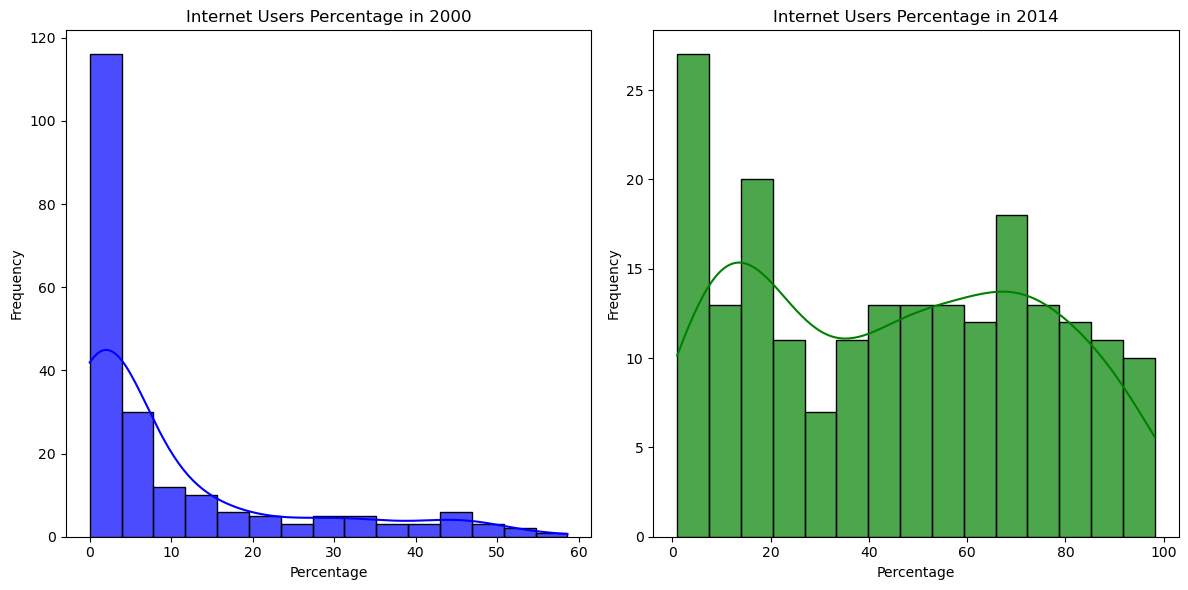

''

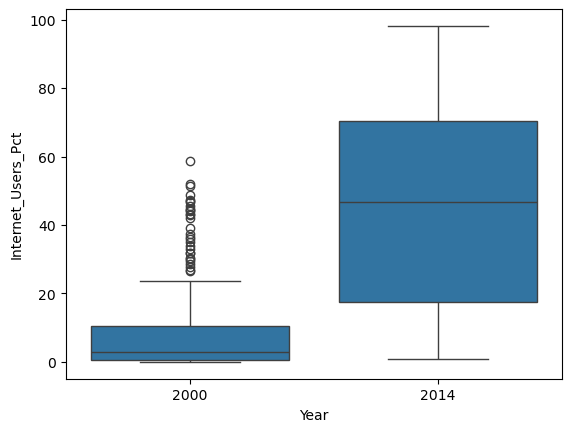

In [169]:
# Filtrar datos para los años 2000 y 2014
internet_df_2000 = internet_df[internet_df['Year'] == 2000]
internet_df_2014 = internet_df[internet_df['Year'] == 2014]

# Estadísticas descriptivas
stats_2000 = internet_df_2000['Internet_Users_Pct'].describe()
stats_2014 = internet_df_2014['Internet_Users_Pct'].describe()

print("Statistics for the year 2000:")
print(stats_2000)
print("\nStatistics for the year 2014:")
print(stats_2014)

# Visualización: Histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(internet_df_2000['Internet_Users_Pct'], bins=15, kde=True, color='blue', alpha=0.7)
plt.title('Internet Users Percentage in 2000')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(internet_df_2014['Internet_Users_Pct'], bins=15, kde=True, color='green', alpha=0.7)
plt.title('Internet Users Percentage in 2014')
plt.xlabel('Percentage')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualización: Boxplots
sns.boxplot(data = internet_df[internet_df['Year'].isin([2000,2014])],
           x='Year',
           y = 'Internet_Users_Pct')
;


#19.For how many countries was the percentage of internet users below 5% in 2014?

In [179]:
internet_df[(internet_df['Internet_Users_Pct']<5) & (internet_df['Year']==2014)].nunique()

Country               10
Year                   1
Internet_Users_Pct    10
dtype: int64

#20.Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. 
Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly

In [199]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df,on=['Year','Country'], how='outer')

In [205]:
gdp_and_internet_use.head(15)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.0
1,Africa Eastern and Southern,1990,3037.297466,NaN
2,Africa Western and Central,1990,2788.301039,NaN
3,Albania,1990,4827.027705,0.0
4,Algeria,1990,8828.874473,0.0
5,American Samoa,1990,NaN,0.0
6,Andorra,1990,NaN,0.0
7,Angola,1990,5793.084512,0.0
8,Anguilla,1990,NaN,0.0
9,Antigua and Barbuda,1990,15264.351922,0.0


In [197]:
gdp_and_internet_use.tail()

,Country_x,Year,GDP_Per_Capita,Country_y,Internet_Users_Pct
1422391,NaN,2023,NaN,Kuwait,99.7473
1422392,NaN,2023,NaN,Latvia,92.1879
1422393,NaN,2023,NaN,Luxembourg,99.3479
1422394,NaN,2023,NaN,Sweden,95.7033
1422395,NaN,2023,NaN,Türkiye,85.9607


#19.Find the three countries with the highest internet users percentage in 2014.

In [225]:
internet_df_2014.sort_values(by='Internet_Users_Pct',ascending=False).head(3)

,Country,Year,Internet_Users_Pct
2592,Iceland,2014,98.158
1893,Falkland (Malvinas) Islands,2014,97.600
602,Bermuda,2014,96.800
